In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
file = "D:\Desktop\sem_7\WN\WN_q2_data\Q2_all_info.csv"
df = pd.read_csv(file)

In [47]:
df

,No.,Time,Source,Destination,Protocol,Length,PHY type,Source address,Data rate,Signal strength (dBm),Info
0,1,0.000000,AzureWav_16:19:87 (14:13:33:16:19:87) (TA),Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (RA),802.11,58,802.11a (OFDM),NaN,24.0,-65 dBm,"Request-to-send, Flags=........C"
1,2,0.000010,NaN,AzureWav_16:19:87 (14:13:33:16:19:87) (RA),802.11,52,802.11a (OFDM),NaN,24.0,-69 dBm,"Clear-to-send, Flags=........C"
2,3,0.000012,Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA),AzureWav_16:19:87 (14:13:33:16:19:87) (RA),802.11,70,802.11a (OFDM),NaN,24.0,-65 dBm,"802.11 Block Ack, Flags=........C"
3,4,0.000015,AzureWav_16:19:87 (14:13:33:16:19:87) (TA),Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (RA),802.11,58,802.11a (OFDM),NaN,24.0,-64 dBm,"Request-to-send, Flags=........C"
4,5,0.000017,NaN,AzureWav_16:19:87 (14:13:33:16:19:87) (RA),802.11,52,802.11a (OFDM),NaN,24.0,-67 dBm,"Clear-to-send, Flags=........C"
...,...,...,...,...,...,...,...,...,...,...,...
262675,262676,314.135303,Apple_e8:aa:17,Cisco_2d:af:0b,802.11,66,802.11a (OFDM),d4:57:63:e8:aa:17,24.0,-81 dBm,"Null function (No data), SN=2267, FN=0, Flags=..."
262676,262677,314.135322,NaN,Apple_e8:aa:17 (d4:57:63:e8:aa:17) (RA),802.11,52,802.11a (OFDM),NaN,24.0,-65 dBm,"Acknowledgement, Flags=........C"
262677,262678,314.135326,Apple_e8:aa:17 (d4:57:63:e8:aa:17) (TA),Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (RA),802.11,58,802.11a (OFDM),NaN,24.0,-79 dBm,"Request-to-send, Flags=........C"
262678,262679,314.135330,NaN,Apple_e8:aa:17 (d4:57:63:e8:aa:17) (RA),802.11,52,802.11a (OFDM),NaN,24.0,-62 dBm,"Clear-to-send, Flags=........C"


In [28]:
print(df)

           No.        Time                                      Source  \
0            1    0.000000  AzureWav_16:19:87 (14:13:33:16:19:87) (TA)   
1            2    0.000010                                         NaN   
2            3    0.000012     Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA)   
3            4    0.000015  AzureWav_16:19:87 (14:13:33:16:19:87) (TA)   
4            5    0.000017                                         NaN   
...        ...         ...                                         ...   
262675  262676  314.135303                              Apple_e8:aa:17   
262676  262677  314.135322                                         NaN   
262677  262678  314.135326     Apple_e8:aa:17 (d4:57:63:e8:aa:17) (TA)   
262678  262679  314.135330                                         NaN   
262679  262680  314.135334     Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA)   

                                       Destination Protocol  Length  \
0          Cisco_2d:af:0b (c4:0a:cb:2d:a

In [6]:
mac_addr = df["Source address",].unique()
access_points = df["Destination"].unique()
clients = df["Source"].unique()

print("Number of unique MAC addresses: ", len(mac_addr) - 1)
print("Number of unique access points: ", len(access_points))
print("Number of unique clients: ", len(clients) - 1)

Number of unique MAC addresses:  2625
Number of unique access points:  816
Number of unique clients:  2691


nan

In [7]:
client_signal = {}
for i in range(len(df)):
    if df.iloc[i]["Source"] is not np.nan:
        ss = int(df.iloc[i]["Signal strength (dBm)"].split(" ")[0])
        if df.iloc[i]["Source"] not in client_signal:
            client_signal[df.iloc[i]["Source"]] = [0, 0]
        client_signal[df.iloc[i]["Source"]][0] += ss
        client_signal[df.iloc[i]["Source"]][1] += 1

for key in client_signal:
    client_signal[key] = client_signal[key][0] / client_signal[key][1]

In [8]:
print("Average signal strength of clients: ")
client_signal

Average signal strength of clients: 


{'AzureWav_16:19:87 (14:13:33:16:19:87) (TA)': -65.51665756417259,
 'Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA)': -67.35725903401456,
 'Cisco_2d:af:0a': -67.00628772635815,
 'OnePlusT_78:4b:a5': -66.66929133858268,
 'XiaomiCo_31:aa:8d': -67.90697674418605,
 'Apple_73:82:26': -68.2,
 'XiaomiCo_68:72:09': -67.5,
 '7a:b9:74:ae:54:7c': -66.71698113207547,
 'Apple_21:a6:a8 (b0:be:83:21:a6:a8) (TA)': -75.6433344470431,
 'Cisco_2d:af:0f': -66.85882052591269,
 'Microsof_60:22:d6': -67.81395348837209,
 'AzureWav_15:37:83': -66.64050558495003,
 'c2:be:16:aa:6b:07': -68.0,
 'Cisco_2d:af:0b': -66.69050715214564,
 'Apple_ca:1a:e8': -69.0,
 'IntelCor_cd:45:33': -65.43478260869566,
 'CloudNet_65:49:bd': -66.41666666666667,
 'Apple_14:13:93': -70.33333333333333,
 '14:d4:24:8e:3b:4f': -66.1,
 'IntelCor_8a:fd:4a': -66.0909090909091,
 'Apple_aa:48:7a': -66.3491124260355,
 'Cisco_2d:af:0d': -66.89580559254327,
 'Cisco_2d:af:0e': -67.06016079844747,
 'OnePlusT_26:eb:77': -70.51486830926083,
 'Cisco_2d:af:0c':

In [9]:
client_datarate = {}
for i in range(len(df)):
    if df.iloc[i]["Source"] is not np.nan:
        dr = df.iloc[i]["Data rate"]
        if df.iloc[i]["Source"] not in client_datarate:
            client_datarate[df.iloc[i]["Source"]] = [0, 0]
        client_datarate[df.iloc[i]["Source"]][0] += dr
        client_datarate[df.iloc[i]["Source"]][1] += 1

for key in client_datarate:
    client_datarate[key] = client_datarate[key][0] / client_datarate[key][1]

In [10]:
print("Average data rate of clients: ")
client_datarate

Average data rate of clients: 


{'AzureWav_16:19:87 (14:13:33:16:19:87) (TA)': 22.33615510649918,
 'Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA)': 51.35704688494449,
 'Cisco_2d:af:0a': 54.0,
 'OnePlusT_78:4b:a5': 54.0,
 'XiaomiCo_31:aa:8d': 54.0,
 'Apple_73:82:26': 54.0,
 'XiaomiCo_68:72:09': 54.0,
 '7a:b9:74:ae:54:7c': 54.0,
 'Apple_21:a6:a8 (b0:be:83:21:a6:a8) (TA)': 39.323755429335115,
 'Cisco_2d:af:0f': 54.0,
 'Microsof_60:22:d6': 54.0,
 'AzureWav_15:37:83': 54.0,
 'c2:be:16:aa:6b:07': 54.0,
 'Cisco_2d:af:0b': 54.0,
 'Apple_ca:1a:e8': 54.0,
 'IntelCor_cd:45:33': 54.0,
 'CloudNet_65:49:bd': 54.0,
 'Apple_14:13:93': 54.0,
 '14:d4:24:8e:3b:4f': 54.0,
 'IntelCor_8a:fd:4a': 54.0,
 'Apple_aa:48:7a': 54.0,
 'Cisco_2d:af:0d': 54.0,
 'Cisco_2d:af:0e': 54.0,
 'OnePlusT_26:eb:77': 23.985131690739166,
 'Cisco_2d:af:0c': 54.0,
 'Cisco_2d:af:0a (c4:0a:cb:2d:af:0a) (TA)': 50.685249709639955,
 '70:22:fe:c5:df:19': 54.0,
 'OnePlusT_b0:16:17': 54.0,
 'XiaomiCo_38:d3:4d': 54.0,
 'vivoMobi_93:2d:a9': 54.0,
 'BeijingX_15:16:ce': 53.889277

In [11]:
standards, count = np.unique(df["PHY type"], return_counts=True)
for i in range(len(standards)):
    print(standards[i], 'used by', count[i], 'clients')

802.11a (OFDM) used by 261011 clients
802.11n (HT) used by 1669 clients


No.                                                       262680
Time                                                  314.135334
Source                   Cisco_2d:af:0b (c4:0a:cb:2d:af:0b) (TA)
Destination              Apple_e8:aa:17 (d4:57:63:e8:aa:17) (RA)
Protocol                                                  802.11
Length                                                        70
PHY type                                          802.11a (OFDM)
Source address                                               NaN
Data rate                                                   54.0
Signal strength (dBm)                                    -63 dBm
Info                           802.11 Block Ack, Flags=........C
Name: 262679, dtype: object

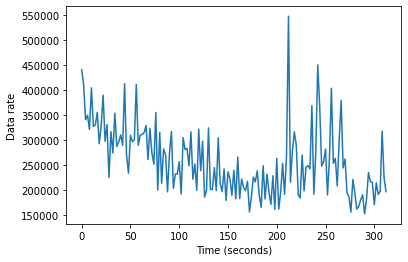

In [52]:
# Initialize variables to keep track of time and data rate sums
current_window_start = df['Time'].iloc[0]
data_rate = 0.0
data_rate_list = []
time_list = []

# Define the window size in seconds (2 seconds)
window_size = 2.0

for index, row in df.iterrows():
    time = row['Time']
    data_rate += row['Data rate']

    if time - current_window_start >= window_size:
        time_list.append(current_window_start)
        data_rate = data_rate* 8 / 2
        data_rate_list.append(data_rate)
        current_window_start += window_size
        data_rate = 0.0

plt.plot(time_list, data_rate_list)
plt.xlabel("Time (seconds)")
plt.ylabel("Data rate")
plt.show()

In [21]:
# print(result_df)
print(df["Time"])

0        1970-01-01 00:00:00.000000000
1        1970-01-01 00:00:00.000000000
2        1970-01-01 00:00:00.000000000
3        1970-01-01 00:00:00.000000000
4        1970-01-01 00:00:00.000000000
                      ...             
262675   1970-01-01 00:00:00.000000314
262676   1970-01-01 00:00:00.000000314
262677   1970-01-01 00:00:00.000000314
262678   1970-01-01 00:00:00.000000314
262679   1970-01-01 00:00:00.000000314
Name: Time, Length: 262680, dtype: datetime64[ns]
